# rigidbody-system-latency

Explanation: More agents, heavier for cpu, more processing for spatial audio because it increases encoders, decoders, signals, etc, and synthes

SUBSTRACT screen latency

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

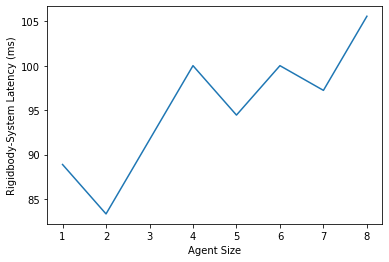

[ 88.88888889  83.33333333  91.66666667 100.          94.44444444
 100.          97.22222222 105.55555556]
all mean: 95.13888888888889


In [2]:
#Load file
rigidbody_system_latency = pd.read_csv('./FinalDatasets/rigidbody-system-latency/rigidbody-system-latency.csv')

means_per_agent = []
for i in range(8):
    means_per_agent.append(np.mean(rigidbody_system_latency['frames_60'].values[6 * i: 6 * (i + 1)]))

means_per_agent = np.array(means_per_agent) * 1000/60.0
plt.figure()
plt.xlabel('Agent Size')
plt.ylabel('Rigidbody-System Latency (ms)')
plt.plot(np.arange(1, 9, 1), means_per_agent)
plt.savefig('figures/2-rigidbody-system-latency/rigidbody-system-latency.pdf')
plt.show()
print(means_per_agent)
print('all mean: ' + str(np.mean(rigidbody_system_latency['frames_60'].values) * 1000/60))


In [36]:
import numpy.linalg as LA
def angleBetween(a, b):

    inner = np.inner(a, b)
    norms = LA.norm(a) * LA.norm(b)

    cos = inner / norms
    rad = np.arccos(np.clip(cos, -1.0, 1.0))
    deg = np.rad2deg(rad)
    return rad, deg

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    rad = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    return rad, np.rad2deg(rad)

rigidbody_system_latency
x = rigidbody_system_latency['b_s_x_mm'] - rigidbody_system_latency['a_s_x_mm']
y = rigidbody_system_latency['b_s_y_mm'] - rigidbody_system_latency['a_s_y_mm']
z = rigidbody_system_latency['b_s_z_mm'] - rigidbody_system_latency['a_s_z_mm']

up = np.zeros((48, 3))
up[:, 2] =  1

vectors = np.array([x, y, z]).transpose()

deg_all = []
for i in range(vectors.shape[0]):
    rad, deg = angle_between(vectors[i], up[i])
    deg_all.append(deg - 90)
np.mean(deg_all)

19.393717230943114

In [22]:
deg

array([[90.0769716 , 90.0769716 , 90.0769716 , ..., 90.0769716 ,
        90.0769716 , 90.0769716 ],
       [90.1979273 , 90.1979273 , 90.1979273 , ..., 90.1979273 ,
        90.1979273 , 90.1979273 ],
       [90.28589561, 90.28589561, 90.28589561, ..., 90.28589561,
        90.28589561, 90.28589561],
       ...,
       [90.40318778, 90.40318778, 90.40318778, ..., 90.40318778,
        90.40318778, 90.40318778],
       [90.50215433, 90.50215433, 90.50215433, ..., 90.50215433,
        90.50215433, 90.50215433],
       [90.63411212, 90.63411212, 90.63411212, ..., 90.63411212,
        90.63411212, 90.63411212]])